<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/pytorch_custom_dataset_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Pytroch Custom dataset

## 0. Import PyTorch and setting up agnostic device

In [1]:

import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets
import os
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cpu


## 1. Get data

In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Download pizza data if it doesn't exist

if image_path.is_dir():
    print(f"Image directory exists {image_path}")
else:
    print(f"Image directory does not exist {image_path}")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi dta
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

Image directory does not exist data/pizza_steak_sushi
Unzipping pizza, steak, sushi data...


## 2. Becomming one with the data

In [4]:
import os

def walk_through_dir(dir_path):

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [5]:
# Setup train and testing paths

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing a image

Random image path: data/pizza_steak_sushi/test/pizza/1152100.jpg
Image height: 384
Image width: 512


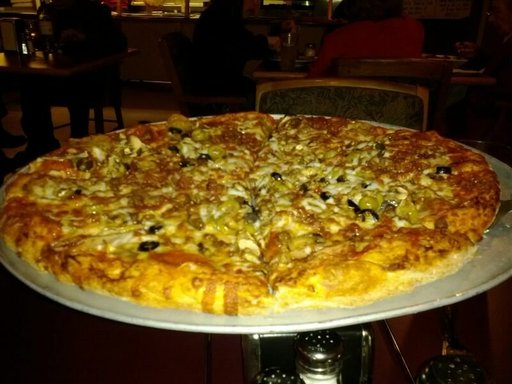

In [6]:
import random
from PIL import Image

random.seed(42)

#1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

#2. Pick a random image path
random_image = random.choice(image_path_list)

image_class = random_image.parent.stem

#3. Pick a random image path
img = Image.open(random_image)

print(f"Random image path: {random_image}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img

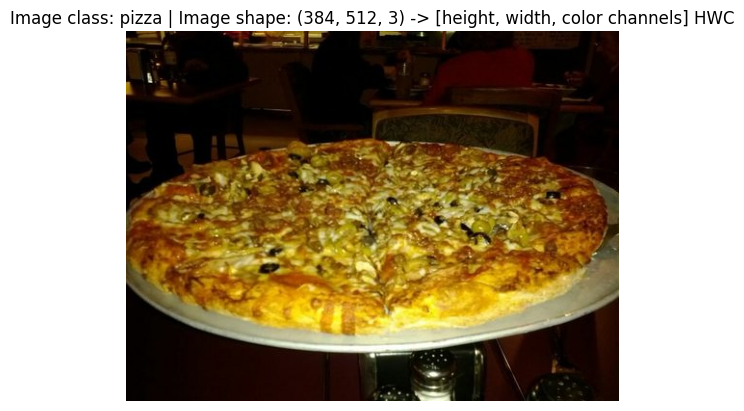

In [7]:
import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.array(img)

plt.imshow(image_as_array)
plt.title(f"Image class: {image_class} | Image shape: {image_as_array.shape} -> [height, width, color channels] HWC")
plt.axis(False);


## 3. Transforming data

### 3.1 Transformin dta with `torchvision.transforms`

In [9]:
data_transform = transforms.Compose([
    transforms.Resize((64, 64)), # Resize our images
    transforms.RandomHorizontalFlip(p=0.5), # Flipe the images randomly
    transforms.ToTensor() # Turn image into a torch tensor
])

In [12]:
data_transform(img).shape

torch.Size([3, 64, 64])

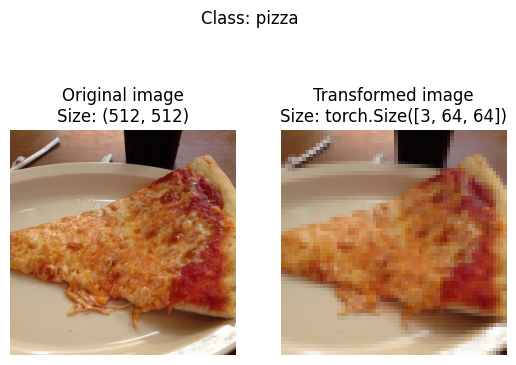

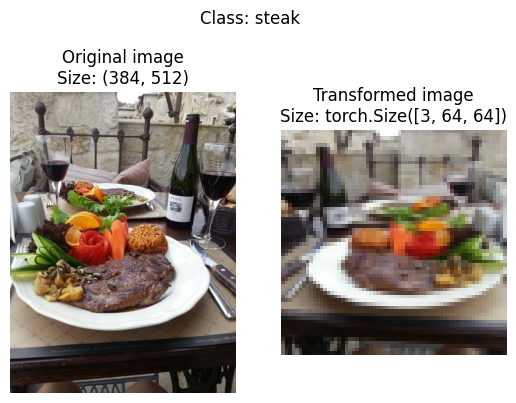

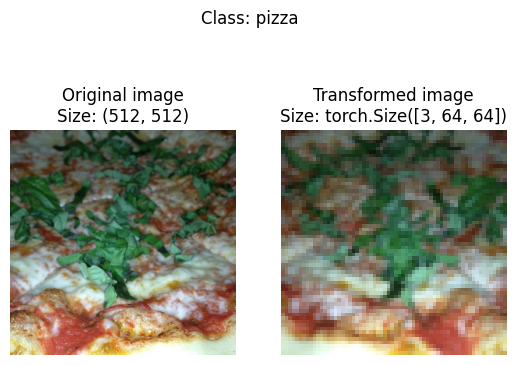

In [16]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_paths, k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original image\nSize: {f.size}")
      ax[0].axis(False)

      transformed_img = transform(f) # Note we will need to change shape
      ax[1].imshow(transformed_img.permute(1, 2, 0)) # Note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].set_title(f"Transformed image\nSize: {transformed_img.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}")
      plt.show()

plot_transformed_images(
    image_paths=image_path_list,
    transform=data_transform,
    n=3,
    seed=42
  )